In [1]:
import numpy as np
import torch
import sys
sys.path.append('../')
from voting_games.werewolf_env_v0 import plurality_env, pare, Phase, Roles
import random
import copy
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from notebooks.learning_agents.models import ActorCriticAgent
from notebooks.learning_agents.utils import play_recurrent_game, convert_obs
from notebooks.learning_agents.static_agents import random_approval_wolf, random_plurality_wolf
import notebooks.learning_agents.stats as indicators 
import networkx as nx 

/root/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = plurality_env(num_agents=10, werewolves=2, num_accusations=2)
observations, _, _, _, _ = env.reset()

obs_size= env.convert_obs(observations['player_0']['observation']).shape[-1]

untrained_plurality_agent = ActorCriticAgent({"rec_hidden_size": 128, 
                                        "rec_layers": 1,
                                        "joint_mlp_size": 128,
                                        "split_mlp_size": 128,
                                        "num_votes": 1,
                                        "approval_states": 10},
                                        num_players=10,
                                        obs_size=obs_size)

In [3]:
from torchview import draw_graph
from torchviz import make_dot

In [4]:
obs = convert_obs(observations['player_0']['observation'], voting_type='plurality')
obs = torch.unsqueeze(obs,0)
hxcs = (torch.zeros((1,1,128), dtype=torch.float32), torch.zeros((1,1,128), dtype=torch.float32))

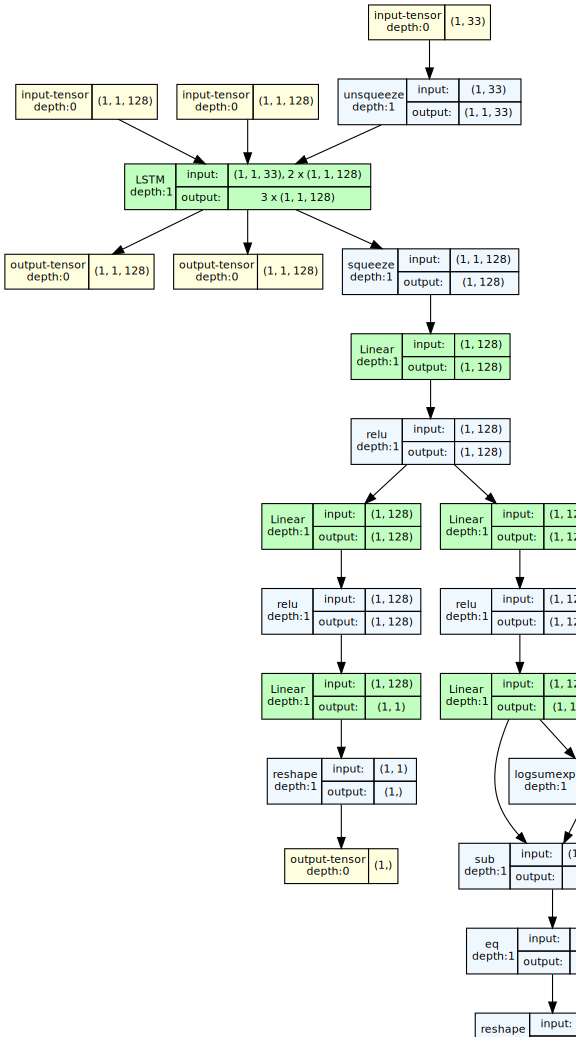

In [5]:
model_graph = draw_graph(untrained_plurality_agent, input_data=[obs,hxcs], device=torch.device('cpu'))
model_graph.visual_graph